In [1]:
import pickle
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
sys.path.append('..')
from utils.util import *
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("talk")
# sns.set_context("paper")

In [2]:
analyze_name = 'analyze_credit_assignment'

## Read Results

In [5]:
# ----------------------
ctx_order = 'first'
ctx_order_str = 'ctxF'
# ----------------------
with open('../../results/%s_%s_results_rnn_normgrad.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxF = pickle.load(f)
# ----------------------
ctx_order = 'last'
ctx_order_str = 'ctxL'
# ----------------------
with open('../../results/%s_%s_results_rnn_normgrad.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxL = pickle.load(f)

In [6]:
rnn_runs_ctxF        = dict_to_list(rnn_results_ctxF, analyze_name)
rnn_runs_ctxL        = dict_to_list(rnn_results_ctxL, analyze_name)
rnn_runs_ctxF.keys()

dict_keys(['grad_ctx', 'grad_f1', 'grad_f2', 'grad_ctx_cong', 'grad_f1_cong', 'grad_f2_cong', 'grad_ctx_incong', 'grad_f1_incong', 'grad_f2_incong'])

In [42]:
def concat_dfs(ctx_order, ctx_order_str):
    vals_str = eval('rnn_runs_%s' %(ctx_order_str))
    dfs = []
    for i, key in enumerate(vals_str.keys()):
        if ctx_order is not None:
            norm_grad = eval('np.asarray(rnn_runs_%s[key])' %(ctx_order_str))
            runs, checkpoints = norm_grad.shape
            df = pd.DataFrame(norm_grad, columns=np.arange(checkpoints)) 
            df.insert(0, 'runs', np.arange(runs))
            df_norm_grad = pd.melt(df, id_vars=['runs'], var_name='steps', value_name="Norm of Gradients")
            strs = key.split('_')
            df_norm_grad['Inputs'] = strs[1]
            if len(strs)<3:
                df_norm_grad['Congruency'] = 'all'
            else:
                df_norm_grad['Congruency'] = strs[2]
            dfs.append(df_norm_grad)
        # ------------
    dfs_norm_grad = pd.concat(dfs)
    return dfs_norm_grad

In [58]:
def plot_norm_gard(df, ctx_order, ctx_order_str, model_str, mfig_str, sub_title, ax):
        mi, mx = 0, 0.075
        val_name = "Norm of Gradients"
        
        ax = sns.lineplot(data=df,
                                x="steps", y=val_name, hue="Inputs",\
                                style='Congruency', \
                                markers=True, dashes=False, err_style="bars", ci=68, ax=ax)

        ax.set_ylim([mi, mx])
        ax.set_title(sub_title)
        if ctx_order is not None:
                fig.suptitle('Credit Assignment in %s - Ax %s' %(model_str, ctx_order), fontweight='bold', fontsize='25')
        else:
                fig.suptitle('Credit Assignment in %s' %(model_str), fontweight='bold', fontsize='25')

        plt.tight_layout()

        fig_str = '%s_norm_gradient_results_%s' %(ctx_order_str, mfig_str)
        fig.savefig(('../../figures/' + fig_str + '.pdf'), 
                        bbox_inches = 'tight', pad_inches = 0)
        fig.savefig(('../../figures/' + fig_str + '.png'), 
                        bbox_inches = 'tight', pad_inches = 0)  
        return ax



# RNN

In [59]:
figx, figy = 12, 6

# RNN

<AxesSubplot:xlabel='steps', ylabel='Norm of Gradients'>

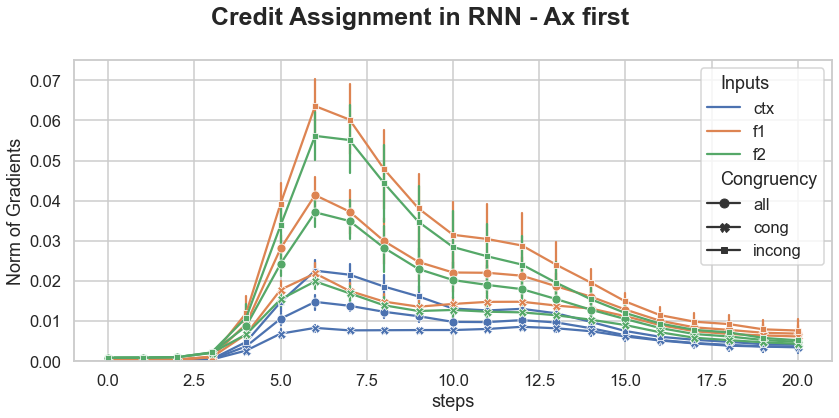

In [60]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'first', 'ctxF', 'RNN', 'normgradrnn', ''
model_name = 'rnn'
dfs_norm_grad = concat_dfs(ctx_order, ctx_order_str)
plot_norm_gard(dfs_norm_grad, ctx_order, ctx_order_str, model_str, mfig_str, sub_title, ax)

## Ax last

<AxesSubplot:xlabel='steps', ylabel='Norm of Gradients'>

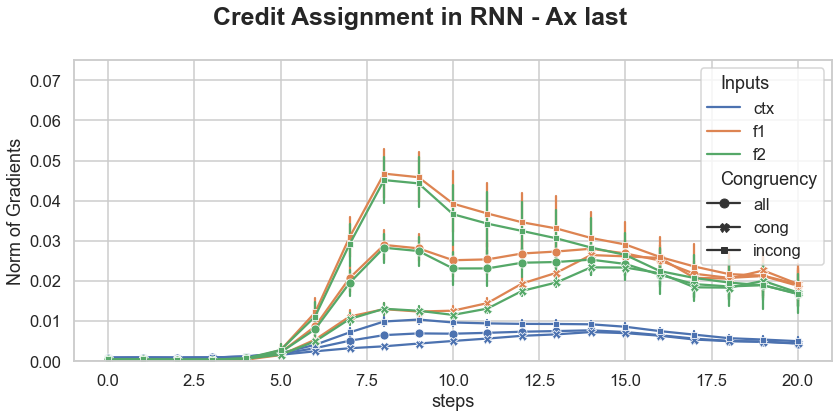

In [61]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'last', 'ctxL', 'RNN', 'normgradrnn', ''
model_name = 'rnn'
dfs_norm_grad = concat_dfs(ctx_order, ctx_order_str)
plot_norm_gard(dfs_norm_grad, ctx_order, ctx_order_str, model_str, mfig_str, sub_title, ax)